In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv("churn_data.csv")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# X = data.loc[:, 'gender': 'TotalCharges']
# Y = data['Churn']

In [47]:
new_data = data[data.Churn == 'No'].reset_index()
new_data = new_data.iloc[0:1500, ]
new_data = pd.concat([new_data, data[data.Churn == 'Yes']], ignore_index=True)

X = new_data.loc[:, 'gender': 'TotalCharges']
Y = new_data['Churn']


In [48]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1500 non-null   float64
 1   customerID        3369 non-null   object 
 2   gender            3369 non-null   object 
 3   SeniorCitizen     3369 non-null   int64  
 4   Partner           3369 non-null   object 
 5   Dependents        3369 non-null   object 
 6   tenure            3369 non-null   int64  
 7   PhoneService      3369 non-null   object 
 8   MultipleLines     3369 non-null   object 
 9   InternetService   3369 non-null   object 
 10  OnlineSecurity    3369 non-null   object 
 11  OnlineBackup      3369 non-null   object 
 12  DeviceProtection  3369 non-null   object 
 13  TechSupport       3369 non-null   object 
 14  StreamingTV       3369 non-null   object 
 15  StreamingMovies   3369 non-null   object 
 16  Contract          3369 non-null   object 


In [49]:
Y = Y.map({"Yes": 1, "No": 0})

In [50]:
Y[Y == 1].sum()

1869

In [51]:
Y[Y == 0].count()

1500

In [52]:
X.gender = X.gender.map({"Male": 1, "Female": 0})
X.Partner = X.Partner.map({"Yes": 1, "No": 0})
X.Dependents = X.Dependents.map({"Yes": 1, "No": 0})
X.PaperlessBilling = X.PaperlessBilling.map({"Yes": 1, "No": 0})
X.TotalCharges = pd.to_numeric(X.TotalCharges, errors='coerce')

In [53]:
X.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
dtype: int64

In [54]:
X = X.fillna({'TotalCharges': X.TotalCharges.mean()})

In [55]:
X = pd.get_dummies(X, columns=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
                               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', \
                               'Contract'])

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   3369 non-null   int64  
 1   SeniorCitizen                            3369 non-null   int64  
 2   Partner                                  3369 non-null   int64  
 3   Dependents                               3369 non-null   int64  
 4   tenure                                   3369 non-null   int64  
 5   PaperlessBilling                         3369 non-null   int64  
 6   MonthlyCharges                           3369 non-null   float64
 7   TotalCharges                             3369 non-null   float64
 8   PhoneService_No                          3369 non-null   uint8  
 9   PhoneService_Yes                         3369 non-null   uint8  
 10  MultipleLines_No                         3369 no

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

## LogisticRegression

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression(max_iter = 1000)

In [63]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(clf.predict(X_test), y_test)

0.7758007117437722

In [66]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

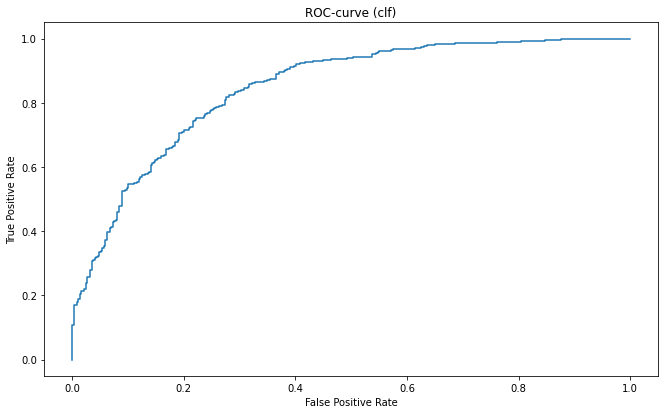

In [71]:
clf_prob_pred = clf.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, clf_prob_pred)
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve (clf)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [72]:
print('AUC ROC score (clf): {:.2f}'.format(roc_auc_score(y_test, clf_prob_pred)))

AUC ROC score (clf): 0.85


In [76]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [74]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       369
           1       0.78      0.84      0.81       474

    accuracy                           0.78       843
   macro avg       0.77      0.77      0.77       843
weighted avg       0.78      0.78      0.77       843



In [75]:
confusion_matrix(y_test, clf.predict(X_test))

array([[257, 112],
       [ 77, 397]], dtype=int64)

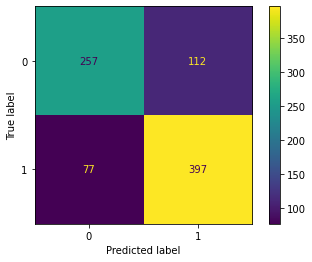

In [77]:
plot_confusion_matrix(clf, X_test, y_test)

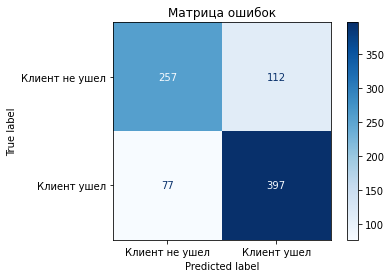

In [82]:
disp = plot_confusion_matrix(clf, X_test, y_test, display_labels=['Клиент не ушел', 'Клиент ушел'], cmap=plt.cm.Blues)
disp.ax_.set_title("Матрица ошибок")

plt.show()